# Goal

I want to explore various wavelet decompositions on digital images.

Questions:
- What effect do various scale and translation parameters have on the decomposition?
- How similar are the decompositions of the same object imaged at two different scales?
- How similar are the decompositions of translations of the same objects?

The overall goal is to investigate if wavelet decompositions might be suitable for constructing adjacency graphs for real-world digital image data.

In [1]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import classification_report

from scipy.linalg import eigh

import pyshearlab as ps
import pywt

from keras.datasets import mnist
from keras.utils import to_categorical

from tabulate import tabulate

In [9]:
# load in MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# only do this for grayscale images
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
# X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

# encode the class labels as one-hot vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [54]:
help(pywt.wavedec2)

Help on function wavedec2 in module pywt._multilevel:

wavedec2(data, wavelet, mode='symmetric', level=None, axes=(-2, -1))
    Multilevel 2D Discrete Wavelet Transform.
    
    Parameters
    ----------
    data : ndarray
        2D input data
    wavelet : Wavelet object or name string, or 2-tuple of wavelets
        Wavelet to use.  This can also be a tuple containing a wavelet to
        apply along each axis in ``axes``.
    mode : str or 2-tuple of str, optional
        Signal extension mode, see :ref:`Modes <ref-modes>`. This can
        also be a tuple containing a mode to apply along each axis in ``axes``.
    level : int, optional
        Decomposition level (must be >= 0). If level is None (default) then it
        will be calculated using the ``dwt_max_level`` function.
    axes : 2-tuple of ints, optional
        Axes over which to compute the DWT. Repeated elements are not allowed.
    
    Returns
    -------
    [cAn, (cHn, cVn, cDn), ... (cH1, cV1, cD1)] : list
      

In [55]:
# wavelet decomposition
n = 3 # number of scales
w = 'db1' # type of mother wavelet

coeffs = [pywt.wavedec2(
    B,
    wavelet = w,
    level = n
) for B in X_train]

# coeff_arrs, coeff_slices = pywt.coeffs_to_array(coeffs)

In [56]:
decomp = [(lambda x: pywt.coeffs_to_array(x))(coeff) for coeff in coeffs]

In [57]:
wavelet_coeffs = np.asarray([decomp[i][0] for i in range(len(decomp))])

In [58]:
decomp[0][1]

[(slice(None, 4, None), slice(None, 4, None)),
 {'ad': (slice(None, 4, None), slice(4, 8, None)),
  'da': (slice(4, 8, None), slice(None, 4, None)),
  'dd': (slice(4, 8, None), slice(4, 8, None))},
 {'ad': (slice(None, 7, None), slice(8, 15, None)),
  'da': (slice(8, 15, None), slice(None, 7, None)),
  'dd': (slice(8, 15, None), slice(8, 15, None))},
 {'ad': (slice(None, 14, None), slice(15, 29, None)),
  'da': (slice(15, 29, None), slice(None, 14, None)),
  'dd': (slice(15, 29, None), slice(15, 29, None))}]

In [59]:
wavelet_coeffs.shape

(60000, 29, 29)

In [60]:
X_train.shape

(60000, 28, 28)

In [61]:
wavelet_coeffs[0].shape

(29, 29)

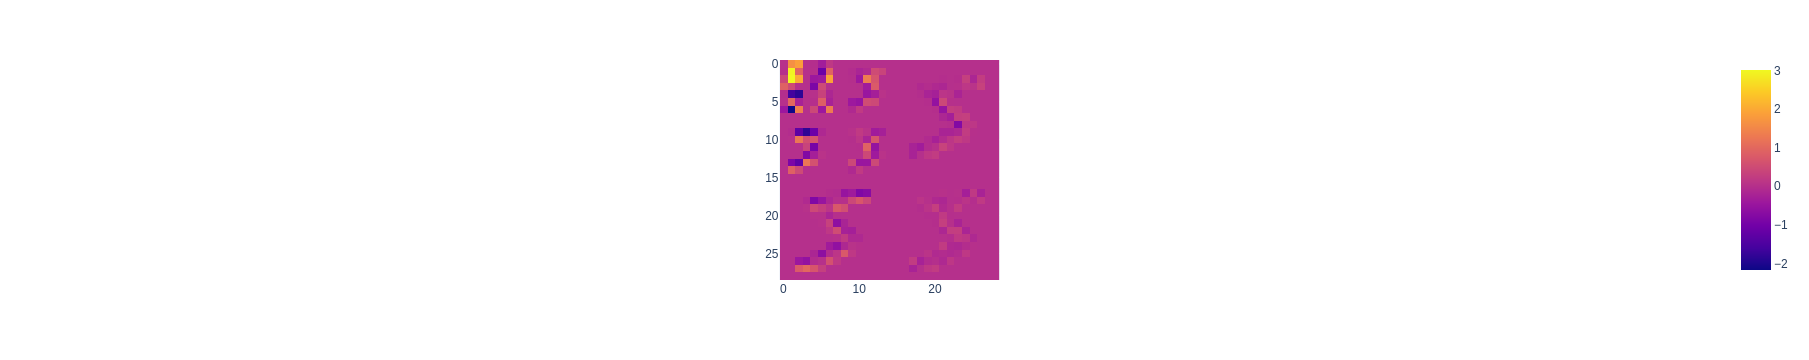

In [62]:
px.imshow(wavelet_coeffs[0])